Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.shape

(2290, 6)

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Finding correlation among features

In [11]:
correlation = gold_data.corr()

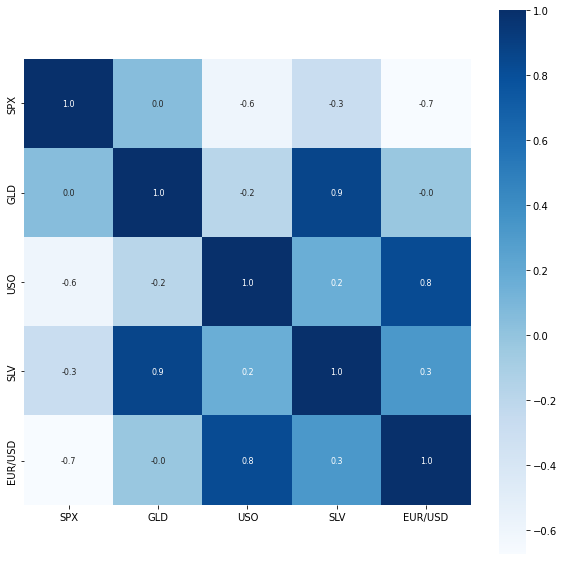

In [12]:
#creating a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square = True, fmt='0.1f',annot = True,annot_kws = {'size':8},cmap='Blues')

Checking the distribution of gold price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


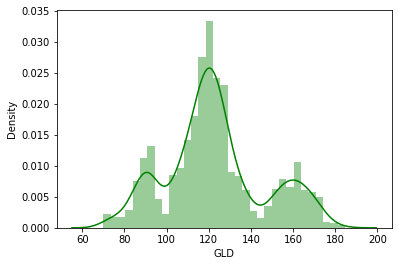

In [13]:
sns.distplot(gold_data['GLD'],color = 'green')

In [8]:
X = gold_data.drop(columns = ['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [9]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting test and train data

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [17]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training

In [18]:
regressor = RandomForestRegressor()

In [19]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Evaluating model

In [20]:
training_data_prediction = regressor.predict(X_train)

In [22]:
#calculating the error
#r squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.9984576935952646


Visualizing the predicted and actual data

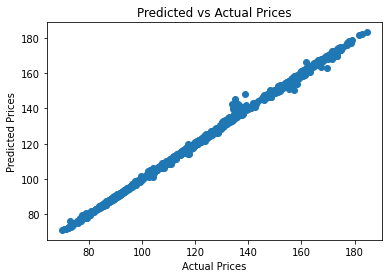

In [23]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

Comparing actual and predicted value

In [27]:
Y_train = list(Y_train)

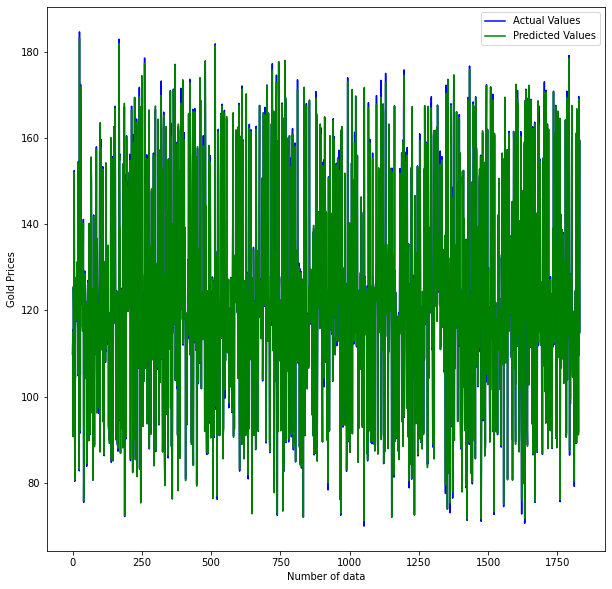

In [28]:
plt.figure(figsize=(10,10))
plt.plot(Y_train,color='blue',label='Actual Values')
plt.plot(training_data_prediction,color='green',label='Predicted Values')
plt.xlabel('Number of data')
plt.ylabel('Gold Prices')
plt.legend()
plt.show()

For Test Data

In [24]:
test_data_prediction = regressor.predict(X_test)

In [25]:
#calculating the error
#r squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.988967503392439


Visualizing the predicted and actual data

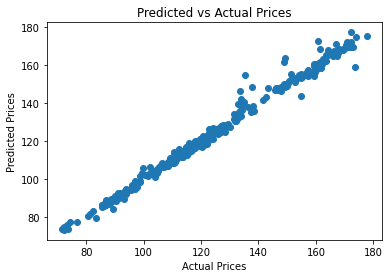

In [26]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

Comparing actual and predicted value

In [29]:
Y_test = list(Y_test)

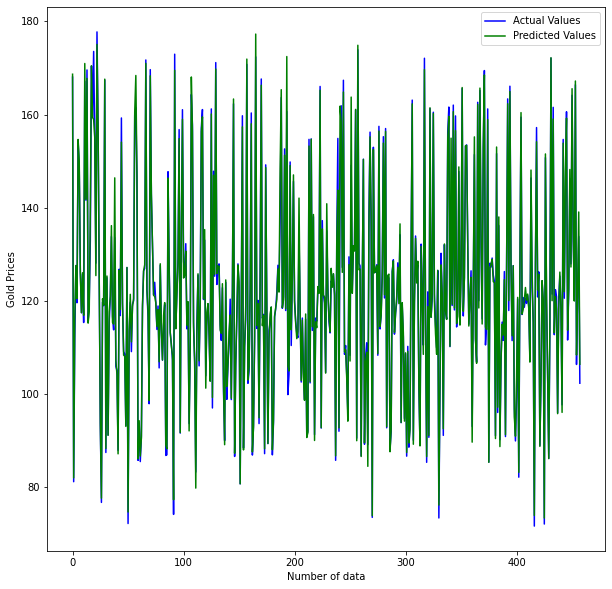

In [30]:
plt.figure(figsize=(10,10))
plt.plot(Y_test,color='blue',label='Actual Values')
plt.plot(test_data_prediction,color='green',label='Predicted Values')
plt.xlabel('Number of data')
plt.ylabel('Gold Prices')
plt.legend()
plt.show()

Making a predictive system

In [32]:
input_data = (1390.189941 , 76.059998,  15.5900,  1.557099)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[86.64579991]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
